In [1]:
import numpy as np
from TMDP import TMDP
from River_swim import River

from algorithms import *
from model_functions import *

import matplotlib.pyplot as plt


#np.set_printoptions(precision=4)
import math
from utils import *

nS = 8
nA = 2
seed = 2184109
gamma = .9
mu = np.ones(nS) * 1/nS
river = River(nS, mu, gamma=gamma, small=5, large=1000, seed=seed)
tau = 0.5
xi = np.ones(nS) * 1/nS
tmdp = TMDP(river, xi, tau=tau, gamma=gamma, seed=seed)
mdp = TMDP(river, xi, tau=0., gamma=gamma, seed=seed)


In [2]:
Q_star, _ = bellman_optimal_q(tmdp.P_mat_tau, tmdp.reward, gamma).values()
pi = get_policy(Q_star)
print(Q_star)

[[192.32880525 189.13661796]
 [189.51630549 188.20638369]
 [188.25068062 187.66121581]
 [187.68114945 187.6218458 ]
 [187.42486044 188.95045693]
 [187.99604883 196.44325045]
 [191.36780594 236.53673494]
 [209.40987398 450.84094187]]


In [3]:
status_step = 50000
episodes = 1000000
batch_size = 1
temperature = 20

In [4]:
"""tmdp = TMDP(river, xi, tau=tau, gamma=gamma, seed=seed)
Q = np.zeros((nS, nA))
Qs = Q_learning(tmdp, Q, alpha=.25, episodes=episodes, status_step=status_step)"""

'tmdp = TMDP(river, xi, tau=tau, gamma=gamma, seed=seed)\nQ = np.zeros((nS, nA))\nQs = Q_learning(tmdp, Q, alpha=.25, episodes=episodes, status_step=status_step)'

In [5]:
tmdp = TMDP(river, xi, tau=tau, gamma=gamma, seed=seed)
Q = np.zeros((nS, nA))
batch_Qs = batch_q_learning(tmdp, Q, alpha=.25, episodes=episodes, status_step=status_step, batch_size=batch_size)

In [6]:
Q=np.zeros((nS, nA))
pg_res = policy_gradient(tmdp, Q, alpha=0.25, episodes=episodes, status_step=status_step, batch_size=batch_size, temperature=temperature)


In [7]:
print(batch_Qs["Qs"][-1])
print(Q_star)
print(pg_res["Qs"][-1])
print(pg_res["thetas"][-1])

[[161.2586894  188.44284541]
 [184.77925603 162.33013779]
 [184.86552284 158.30456773]
 [159.54788392 186.74201859]
 [189.76491635 157.96021069]
 [160.45021035 195.44913637]
 [180.34677503 242.40758793]
 [208.5412773  478.1454023 ]]
[[192.32880525 189.13661796]
 [189.51630549 188.20638369]
 [188.25068062 187.66121581]
 [187.68114945 187.6218458 ]
 [187.42486044 188.95045693]
 [187.99604883 196.44325045]
 [191.36780594 236.53673494]
 [209.40987398 450.84094187]]
[[171.47819875 165.2748456 ]
 [170.98088126 183.1499526 ]
 [165.21954952 169.37286846]
 [170.1336373  158.95049227]
 [166.52026032 158.51076935]
 [197.57456709 178.85907023]
 [159.50632044 211.05232532]
 [184.03382518 405.54048942]]
[[ 101.94134758]
 [ 119.84506165]
 [ -78.50567894]
 [ 117.15856166]
 [  88.2324514 ]
 [ -98.49708149]
 [ -80.63630919]
 [-133.83772964]]


In [8]:
tau_prime = 0.
pg_metrics = compute_metrics(tmdp, pg_res["Qs"], Q_star, pg_res["disc_visits_distributions"], tau_prime=tau_prime)#, is_policy=True, temperature=temperature)
batch_metrics = compute_metrics(tmdp, batch_Qs["Qs"], Q_star, batch_Qs["disc_visits_distributions"], tau_prime=tau_prime)

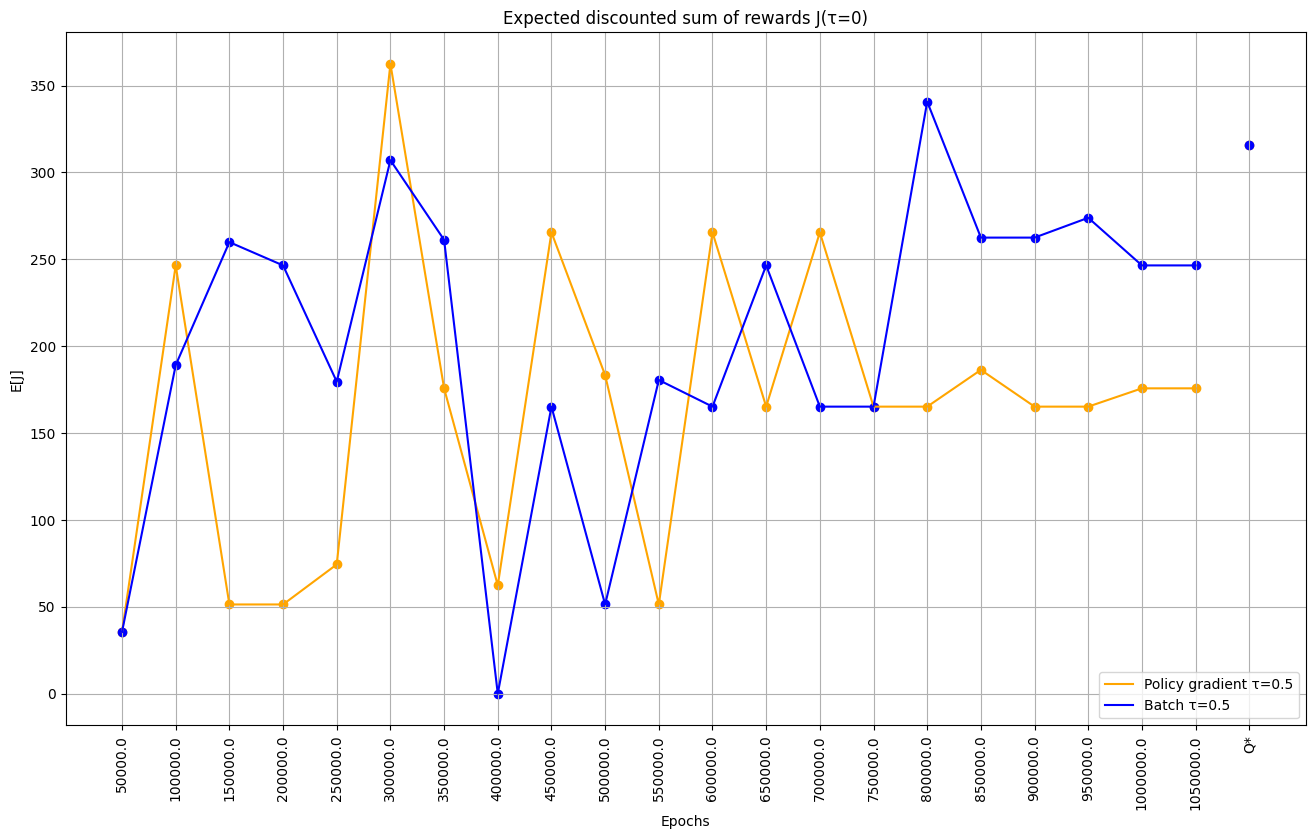

In [9]:
x = np.array([])
y_0 = np.array([])
y = np.array([])

for i, J in enumerate(pg_metrics["J"]):
    y = np.append(y, J)
    y_0 = np.append(y_0, batch_metrics["J"][i])
    if i < len(batch_metrics["J"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.figure(figsize=(16,9))
plt.xticks(rotation=90, fontsize=10)
plt.scatter(x, y, c="orange")
plt.scatter(x, y_0, c="blue")

plt.plot(x[:-1], y[:-1], c="orange", label="Policy gradient τ={}".format(tmdp.tau))
plt.plot(x[:-1], y_0[:-1], c="blue", label="Batch τ={}".format(tmdp.tau))
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.ylabel("E[J]")
plt.title("Expected discounted sum of rewards J(τ=0)")
plt.grid(visible=True)


In [10]:
print(batch_Qs["disc_visits_distributions"][-1])
print(batch_Qs["visits_distributions"][-2])

d = compute_d_from_tau(tmdp.mu, tmdp.P_mat_tau, tmdp.xi, get_policy(Q_star, False), tmdp.gamma, tmdp.tau)
print(d)

[0.21871181 0.11453666 0.10174813 0.07332919 0.10175975 0.1229915
 0.16213836 0.1047846 ]
[0.13186612 0.13894568 0.13102499 0.12914062 0.12051356 0.11750909
 0.1479075  0.08309244]
[0.13908285 0.12545391 0.12497397 0.12488943 0.1246515  0.12436977
 0.12994008 0.1066385 ]
